In [1]:
import sys
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree

sys.path.append('../')
from envir import config

/home/cusp/yg833/.conda/envs/birdsVE3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load Data

In [2]:
df = pd.read_csv(config.dataFol+'all_cleaned_wsp_sonyc_birds.csv')

#### Processing Data
* convert timestamps from UTC to US/Eastern

In [3]:
df['timestamp_est'] = pd.to_datetime(df['timestamp_utc']) \
    .dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
df['year'] = pd.DatetimeIndex(df['timestamp_est']).year
df['month'] = pd.DatetimeIndex(df['timestamp_est']).month
df['week'] = pd.DatetimeIndex(df['timestamp_est']).weekofyear
df['day'] = pd.DatetimeIndex(df['timestamp_est']).dayofyear
df['hour'] = pd.DatetimeIndex(df['timestamp_est']).hour

In [4]:
df.shape

(756880, 34)

In [5]:
df = df.loc[(df.hour>=4)&(df.hour<=8)]

In [6]:
df.dtypes

timestamp_utc                                        object
sonyc_sensor_id                                      object
sonyc_sensor_name                                    object
dBAS_lin_mean                                       float64
l1                                                  float64
l10                                                 float64
l5                                                  float64
l90                                                 float64
count_of_positive_predictions                       float64
pct_positive_predictions                            float64
avg_mtr_#/km/h                                      float64
avg_mt_#/km                                         float64
avg_height_m                                        float64
temp_celcius                                        float64
dewp_celcius                                        float64
rh_percentage                                       float64
wind_dir                                

In [7]:
df.sonyc_sensor_name.unique()

array(['19 Washington Square North', 'Juan Carlos',
       'Shimkin Reading Room', '4 Washington Square North',
       'Kimmel Center'], dtype=object)

In [8]:
df.columns

Index(['timestamp_utc', 'sonyc_sensor_id', 'sonyc_sensor_name',
       'dBAS_lin_mean', 'l1', 'l10', 'l5', 'l90',
       'count_of_positive_predictions', 'pct_positive_predictions',
       'avg_mtr_#/km/h', 'avg_mt_#/km', 'avg_height_m', 'temp_celcius',
       'dewp_celcius', 'rh_percentage', 'wind_dir', 'wind_speed_mph',
       'sea_level_pressure_mb', 'precipitation_mm', 'visibility_miles',
       'gust_mph', 'peak_wind_gust_mph', 's_19WashingtonSquareNorth',
       's_juanCarlos', 's_shimkinReadingRoom', 's_4WashingtonSquareNorth',
       's_kimmelCenter', 'timestamp_est', 'year', 'month', 'week', 'day',
       'hour'],
      dtype='object')

### Decision Tree Model

In [16]:
X = df[['dBAS_lin_mean', 'l90',
       'avg_mtr_#/km/h', 'avg_height_m', 'temp_celcius',
       'wind_dir', 'wind_speed_mph', 'precipitation_mm', 'visibility_miles',
       'year', 'month', 'week', 'day', 'hour']]
y = df.pct_positive_predictions

In [24]:
clf = tree.DecisionTreeRegressor(max_depth=20, max_leaf_nodes=100, random_state=12345)
clf = clf.fit(X, y)

In [18]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names =X.columns,
                                class_names = y,
                                filled=True, rounded=True,
                                special_characters=True)  

In [19]:
graph = graphviz.Source(dot_data)

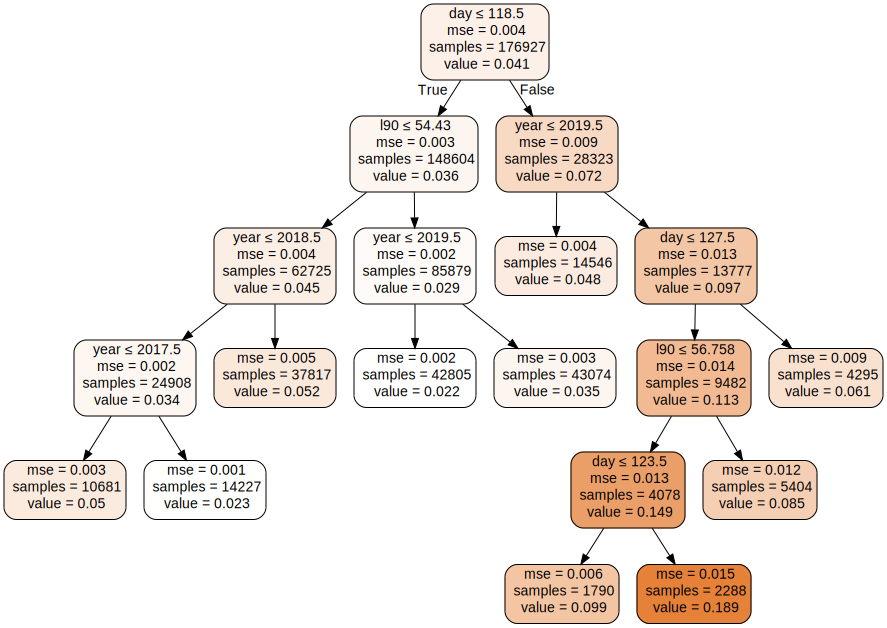

In [20]:
graph

In [25]:
clf.feature_importances_

array([0.00722777, 0.21406897, 0.00979479, 0.02180764, 0.08589732,
       0.07697803, 0.0571262 , 0.02482918, 0.01452774, 0.12639689,
       0.        , 0.02393535, 0.29085324, 0.04655688])

In [26]:
pd.DataFrame(X.columns, clf.feature_importances_)

,0
0.007228,dBAS_lin_mean
0.214069,l90
0.009795,avg_mtr_#/km/h
0.021808,avg_height_m
0.085897,temp_celcius
0.076978,wind_dir
0.057126,wind_speed_mph
0.024829,precipitation_mm
0.014528,visibility_miles
0.126397,year


In [27]:
clf.score(X,y)

0.3276399742488577